### Develop Your First Neural Network in Python With Keras Step-By-Step

by Jason Brownlee on May 24, 2016 in Deep Learning

http://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)

Using TensorFlow backend.


In [2]:
!ls -l

total 312
drwxr-xr-x. 3 user user     33 Jul 18 16:08 image_ocr
-rw-r--r--. 1 user user   2334 Jul 18 15:13 international-airline-passengers.csv
-rw-r--r--. 1 user user 166951 Jul 17 19:53 my_keras_DNN.ipynb
-rw-r--r--. 1 user user  92929 Jul 18 15:22 my_keras_HelloWorld.ipynb
-rw-r--r--. 1 user user  28121 Jul 18 16:08 my_keras_OCR.ipynb
-rw-r--r--. 1 user user  23279 Jul 17 15:01 pima-indians-diabetes.csv


In [3]:
# load pima indians dataset
dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [4]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [5]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
# Fit the model
# model.fit(X, Y, epochs=150, batch_size=10, verbose=0)
model.fit(X, Y, epochs=150, batch_size=10)

Epoch 1/150
768/768 [==============================] - 1s - loss: 3.7507 - acc: 0.6003     
Epoch 2/150
768/768 [==============================] - 0s - loss: 0.9437 - acc: 0.5938     
Epoch 3/150
768/768 [==============================] - 0s - loss: 0.7515 - acc: 0.6380     
Epoch 4/150
768/768 [==============================] - 0s - loss: 0.7133 - acc: 0.6549     
Epoch 5/150
768/768 [==============================] - 0s - loss: 0.6830 - acc: 0.6732     
Epoch 6/150
768/768 [==============================] - 0s - loss: 0.6517 - acc: 0.6797     
Epoch 7/150
768/768 [==============================] - 0s - loss: 0.6502 - acc: 0.6771     
Epoch 8/150
768/768 [==============================] - 0s - loss: 0.6384 - acc: 0.6836     
Epoch 9/150
768/768 [==============================] - 0s - loss: 0.6252 - acc: 0.6940     
Epoch 10/150
768/768 [==============================] - 0s - loss: 0.6318 - acc: 0.6758     
Epoch 11/150
768/768 [==============================] - 0s - loss: 0.6498 - acc

768/768 [==============================] - 0s - loss: 0.5004 - acc: 0.7565     
Epoch 88/150
768/768 [==============================] - 0s - loss: 0.5020 - acc: 0.7669     
Epoch 89/150
768/768 [==============================] - 0s - loss: 0.5076 - acc: 0.7630     
Epoch 90/150
768/768 [==============================] - 0s - loss: 0.5125 - acc: 0.7500     
Epoch 91/150
768/768 [==============================] - 0s - loss: 0.5018 - acc: 0.7513     
Epoch 92/150
768/768 [==============================] - ETA: 0s - loss: 0.5048 - acc: 0.747 - 0s - loss: 0.5064 - acc: 0.7461     
Epoch 93/150
768/768 [==============================] - 0s - loss: 0.4989 - acc: 0.7630     
Epoch 94/150
768/768 [==============================] - 0s - loss: 0.4994 - acc: 0.7630     
Epoch 95/150
768/768 [==============================] - 0s - loss: 0.5076 - acc: 0.7474     
Epoch 96/150
768/768 [==============================] - 0s - loss: 0.4933 - acc: 0.7643     
Epoch 97/150
768/768 [=======================

In [7]:
# evaluate the model
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

672/768 [=========================>....] - ETA: 0s
acc: 78.26%


### Time Series Prediction With Deep Learning in Keras

http://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/

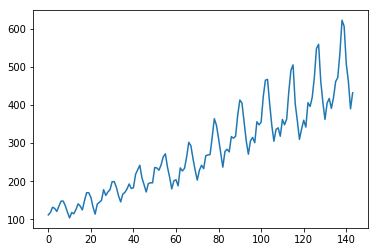

In [1]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [3]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [4]:
# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [5]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [6]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [7]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [8]:
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
4s - loss: 47507.9458
Epoch 2/200
0s - loss: 41607.4178
Epoch 3/200
0s - loss: 35652.4380
Epoch 4/200
0s - loss: 29449.5536
Epoch 5/200
0s - loss: 23374.7649
Epoch 6/200
0s - loss: 17687.2435
Epoch 7/200
0s - loss: 12752.1582
Epoch 8/200
0s - loss: 8665.9318
Epoch 9/200
0s - loss: 5578.7868
Epoch 10/200
0s - loss: 3430.5545
Epoch 11/200
0s - loss: 2067.1212
Epoch 12/200
0s - loss: 1290.3016
Epoch 13/200
0s - loss: 867.7660
Epoch 14/200
0s - loss: 675.4817
Epoch 15/200
0s - loss: 585.4143
Epoch 16/200
0s - loss: 555.2527
Epoch 17/200
0s - loss: 546.7337
Epoch 18/200
0s - loss: 547.3991
Epoch 19/200
0s - loss: 538.8399
Epoch 20/200
0s - loss: 538.5293
Epoch 21/200
0s - loss: 536.9767
Epoch 22/200
0s - loss: 536.0237
Epoch 23/200
0s - loss: 537.1177
Epoch 24/200
0s - loss: 535.7789
Epoch 25/200
0s - loss: 538.2012
Epoch 26/200
0s - loss: 538.4629
Epoch 27/200
0s - loss: 538.2217
Epoch 28/200
0s - loss: 537.3736
Epoch 29/200
0s - loss: 538.2756
Epoch 30/200
0s - loss: 539.0431


In [10]:
import math

In [11]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 531.71 MSE (23.06 RMSE)
Test Score: 2355.08 MSE (48.53 RMSE)


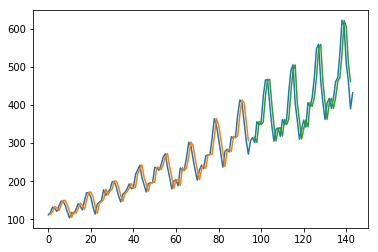

In [12]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()